# 画图：观察不同BatchSize

In [42]:
data = '''BS	1	2	3	4	5	6	7	8
EIA	0.6766	0.6090	0.5401	0.5868	0.4488	0.4848	0.4223	0.4601
TAG	0.974	0.6759	0.5526	0.5536	0.4937	0.4424	0.4405	0.4161
SIP	0.7936	0.7936	0.8009	0.8108	0.7959	0.8096	0.8116	0.7970
BiSR (b)	0.9853	0.9709	0.9616	0.9607	0.9613	0.9624	0.965	0.9563
BiSR (f)	0.9901	0.9662	0.936	0.9346	0.9115	0.9	0.884	0.8855
BiSR (b+f)	0.9806	0.9721	0.8626	0.9136	0.8787	0.8573	0.8112	0.8151
'''

In [43]:
rows = data.split('\n')
rows = [row.split('\t') for row in rows if row]
rows = {row[0]: [float(f) for f in row[1:]] for row in rows}
rows['BS']= [int(f) for f in rows['BS']]

In [44]:

bs = rows['BS']
rgs_dra = rows['SIP']
rgs_tag = rows['TAG']
rgs_ours = rows['BiSR (b+f)']
rgs_fwd = rows['BiSR (f)']
rgs_bwd = rows['BiSR (b)']
rgs_mia = rows['EIA']

all_data = {'SIP-only':rgs_dra, 'TAG*':rgs_tag, 'BiSR':rgs_ours, 'EIA*':rgs_mia}
# 'BiSR (f)':rgs_fwd, 'BiSR (b)':rgs_bwd,

In [45]:
all_data

{'SIP-only': [0.7936, 0.7936, 0.8009, 0.8108, 0.7959, 0.8096, 0.8116, 0.797],
 'TAG*': [0.974, 0.6759, 0.5526, 0.5536, 0.4937, 0.4424, 0.4405, 0.4161],
 'BiSR': [0.9806, 0.9721, 0.8626, 0.9136, 0.8787, 0.8573, 0.8112, 0.8151],
 'EIA*': [0.6766, 0.609, 0.5401, 0.5868, 0.4488, 0.4848, 0.4223, 0.4601]}

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


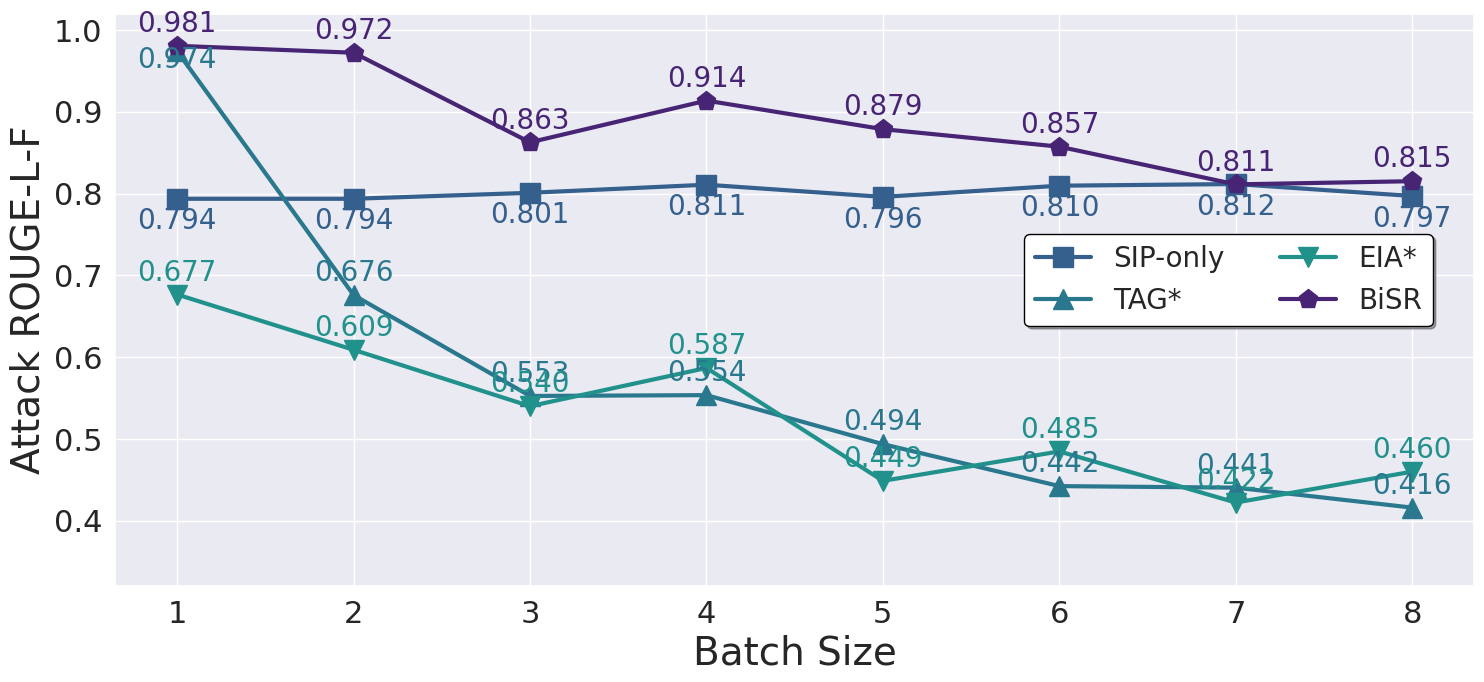

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
fig,ax = plt.subplots(figsize=(15,7))
atk_colors = sns.color_palette("viridis", 9)
color_ppl = sns.color_palette("autumn", 6)[3]
colors = {'BiSR (b)': atk_colors[1], 'SIP-only': atk_colors[2], 'TAG*': atk_colors[3],
            'EIA*': atk_colors[4], 'BiSR': atk_colors[0], 'BiSR (f)': color_ppl}
marker_dict = {'BiSR (b)': 'o', 'SIP-only': 's', 'TAG*': '^','Test-PPL':'d',
            'EIA*': 'v', 'BiSR': 'p', 'BiSR (f)': 'x'}
for name, rouges in all_data.items():
    ax.plot(bs, rouges, color=colors[name], label=name, marker=marker_dict[name],markersize=14,linewidth=3)


    for b, txt in zip(bs, rouges):
        if 'f' in name and not(name == 'BiSR (f)' and b >= 5):
                continue
        pos = 10
        if name == 'SIP-only':
            pos = -22
            if b == 5:
                pos = -22
        elif name == 'BiSR (b)':
            pos = 12
        elif name == 'BiSR (f)':
            pos = -20
        elif name == 'TAG*' and b == 1:
            pos = -12
        ax.annotate(f'{txt:.3f}', (b, txt), textcoords="offset points", xytext=(0, pos),
                             ha='center', fontsize=20, color=colors[name],)

ax.set_ylabel('Attack ROUGE-L-F',  fontsize=28, fontname="Times New Roman")
ax.tick_params(axis='y', labelsize=22)
ax.set_xlabel('Batch Size',  fontsize=28, fontname="Times New Roman")
ax.tick_params(axis='x', labelsize=22)
ax.set_ylim(0.32, 1.02)

handles, labels = ax.get_legend_handles_labels()
handles[2], handles[-1] = handles[-1], handles[2]
labels[2], labels[-1] = labels[-1], labels[2]
plt.legend(handles, labels,  loc='lower right', bbox_to_anchor=(0.98, 0.43), ncol=2, fontsize=20, frameon=True, fancybox=True, shadow=True, framealpha=1, edgecolor='black',facecolor='white')
# plt.legend(fontsize=12, ncol=2, loc='lower right', bbox_to_anchor=(0.98, 0.43),
#            markerscale=0.9, handlelength=3.0)

plt.tight_layout()
plt.savefig('./diff_batch_size.pdf')